In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
session_TE = np.load("session_TE.npy") 

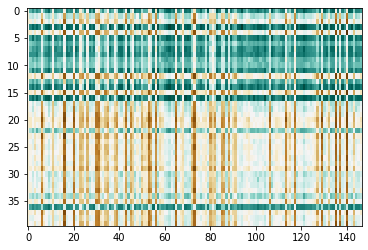

In [26]:
plt.imshow(session_TE, aspect = 'auto', cmap = 'BrBG')

[9.67595453e-01 1.08041401e-02 1.39300226e-03 1.26312491e-03
 1.22129265e-03 1.06175349e-03 1.02839703e-03 9.95243676e-04
 9.70012178e-04 9.19446254e-04 8.44433901e-04 8.24857677e-04
 7.85959604e-04 7.59895472e-04 6.96992821e-04 6.46965090e-04
 6.14405003e-04 5.79135559e-04 5.52180783e-04 5.28716822e-04]


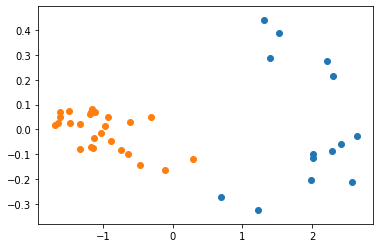

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(session_TE)

pca.explained_variance_
print(pca.explained_variance_ratio_)
pca.components_ #eigenvectors
X_project = pca.fit_transform(session_TE)
max_pc = 3

from sklearn.cluster import KMeans
from scipy import stats

kmeans = KMeans(n_clusters=2).fit(X_project[:,:3])
unsupervised_y_hat = kmeans.labels_

# plot_test_performance(X_project,y,sorted_unsup_y_hat)
plt.scatter(X_project[unsupervised_y_hat==0,0],X_project[unsupervised_y_hat==0,1])
plt.scatter(X_project[unsupervised_y_hat==1,0],X_project[unsupervised_y_hat==1,1])
plt.scatter(X_project[unsupervised_y_hat==2,0],X_project[unsupervised_y_hat==2,1])



In [ ]:
sort_id = np.argsort(unsupervised_y_hat)

plt.imshow(session_TE[sort_id], cmap=plt.get_cmap('brw'), aspect = 'auto')
plt.colorbar()

In [16]:
VISp_unit_clusters = pd.read_pickle("VISp_unit_clusters")

In [18]:
all_units = pd.read_pickle("all_units")